In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

from tqdm import tqdm
import time

import string
import nltk
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.tokenize import WordPunctTokenizer

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem.wordnet import WordNetLemmatizer
import pickle  

#Importing Sklearn function for splitting dataset for training and testing
from sklearn.model_selection  import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Loading the Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data = pd.read_excel("/content/drive/My Drive/Input Data Synthetic.xlsx")

In [4]:
#Have a look at first five rows in dataset
data.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [5]:
#number of rows and columns
data.shape

(8500, 4)

**Description - There are 8500 observations and 4 features**

In [6]:
#Datatypes of each attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


**Description -All the 4 attributes are of object type**

In [7]:
data.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

**Description - There are null values in 'Short description' and 'Description' columns.**

In [0]:
#Dropping the column Caller as it is insignificant for our model
df = data.drop(['Caller'],axis = 1)

In [9]:
df['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [10]:
#Fetch wordcount for each entry in short description
df['word_count_short_dec'] = df['Short description'].apply(lambda x: len(str(x).split(" ")))
df[['Short description','word_count_short_dec']].head()

,Short description,word_count_short_dec
0,login issue,2
1,outlook,1
2,cant log in to vpn,5
3,unable to access hr_tool page,5
4,skype error,3


In [11]:
##Descriptive statistics of word counts
df.word_count_short_dec.describe()

count    8500.000000
mean        7.311765
std         4.325907
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        41.000000
Name: word_count_short_dec, dtype: float64

**Description :
The average word count is about 7 words per short description. The word count ranges from a minimum of 1 to a maximum of 41. The word count is important to give us an indication of the size of the dataset that we are handling as well as the variation in word counts across the rows.**

In [12]:
#Fetch wordcount for each entry in short description
df['word_count_description'] = df['Description'].apply(lambda x: len(str(x).split(" ")))
df[['Description','word_count_description']].head()

,Description,word_count_description
0,-verified user details.(employee# & manager na...,29
1,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,23
2,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,9
3,unable to access hr_tool page,5
4,skype error,3


In [13]:
df.word_count_description.describe()

count    8500.000000
mean       28.877294
std        69.234356
min         1.000000
25%         6.000000
50%        11.000000
75%        26.000000
max      1417.000000
Name: word_count_description, dtype: float64

**Description: The average word count is about 29 words per description. The word count ranges from a minimum of 1 to a maximum of 1417.**

In [0]:
##Creating a list of stop words 
stop_words = set(stopwords.words("english"))

In [0]:
corpus = []
for i in range(0, 8500):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', str(df['Description'][i]))
    text = re.sub(r"[!\"#$%&\'()*+,-./:;<=>?@^_`{|}~\[\]]"," ",text)
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.:-_*?&gt;@"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)

    # Single character removal
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    
    # removing numbers
    text = re.sub(r"[0-9]","",text) 
    
    # Removing multiple spaces
    text = re.sub(r'\s+', ' ', text)

    #Convert to list from string
    text = text.split()
    

    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [17]:
corpus[2]

'received eylqgodm ybqkwiam gmail com hi cannot log vpn best'

In [0]:
corpus2 = []
for i in range(0, 8500):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', str(df['Short description'][i]))
    #text = re.sub(r"[!\"#$%&\'()*+,-./:;<=>?@^_`{|}~\[\]]"," ",text) # removing all punctuations
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.:-_*?&gt;@"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # Single character removal
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    
    # removing numbers
    text = re.sub(r"[0-9]","",text) 
    
    # Removing multiple spaces
    text = re.sub(r'\s+', ' ', text)
    
    #Convert to list from string
    text = text.split()
    

    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus2.append(text)

In [19]:
corpus2[2]

'cant log vpn'

In [30]:
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [0]:
def preprocess_text(sentence):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', str(sentence))
    text = re.sub(r"[!\"#$%&\'()*+,-./:;<=>?@^_`{|}~\[\]]"," ",text)    
    #Convert to lowercase
    text = text.lower()    
    #remove tags
    text=re.sub("&lt;/?.:-_*?&gt;@"," &lt;&gt; ",text)    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    # Single character removal
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    
    # removing numbers
    text = re.sub(r"[0-9]","",text) 
    
    # Removing multiple spaces
    text = re.sub(r'\s+', ' ', text)

    #Convert to list from string
    text = text.split()
    

    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word, get_wordnet_pos(word)) for word in text if not word in stop_words] 
    text = " ".join(text)
    return text

**Dropping the rows conatining missing values**

In [22]:
data = data.dropna(axis=0, how='any',inplace=False)
print(data.isnull().sum())

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64


In [0]:
df_cleaned_text = pd.DataFrame(df)

In [24]:
df_cleaned_text.head()

,Short description,Description,Assignment group,word_count_short_dec,word_count_description
0,login issue,-verified user details.(employee# & manager na...,GRP_0,2,29
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0,1,23
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0,5,9
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,5,5
4,skype error,skype error,GRP_0,3,3


In [0]:
#df_cleaned_text['Short_Descrption'] = corpus2
df_cleaned_text['Short_Descrption'] = df_cleaned_text['Short description'].apply(lambda x: preprocess_text(str(x)))

In [0]:
#df_cleaned_text['DESCRIPTION'] = corpus
df_cleaned_text['DESCRIPTION'] = df_cleaned_text['Description'].apply(lambda x: preprocess_text(str(x)))

In [0]:
df_final = df_cleaned_text.drop(['Short description','Description','word_count_description',
                                        'word_count_short_dec'], axis =1)

In [0]:
df_final.rename(columns = {'Assignment group':'Target'},inplace = True)
 

In [37]:
df_final.head()

,Target,Short_Descrption,DESCRIPTION
0,GRP_0,login issue,verify user detail employee manager name check...
1,GRP_0,outlook,receive hmjdrvpb komuaywn gmail com hello team...
2,GRP_0,cant log vpn,receive eylqgodm ybqkwiam gmail com hi cannot ...
3,GRP_0,unable access hr tool page,unable access hr tool page
4,GRP_0,skype error,skype error


In [38]:
df_final['Description'] =  df_final['Short_Descrption'].str.cat(df_final['DESCRIPTION'], sep =" ") 
df_final.head()


,Target,Short_Descrption,DESCRIPTION,Description
0,GRP_0,login issue,verify user detail employee manager name check...,login issue verify user detail employee manage...
1,GRP_0,outlook,receive hmjdrvpb komuaywn gmail com hello team...,outlook receive hmjdrvpb komuaywn gmail com he...
2,GRP_0,cant log vpn,receive eylqgodm ybqkwiam gmail com hi cannot ...,cant log vpn receive eylqgodm ybqkwiam gmail c...
3,GRP_0,unable access hr tool page,unable access hr tool page,unable access hr tool page unable access hr to...
4,GRP_0,skype error,skype error,skype error skype error


In [39]:
df_final = df_final.drop(['Short_Descrption','DESCRIPTION'],axis = 1)
df_final.head(5)

,Target,Description
0,GRP_0,login issue verify user detail employee manage...
1,GRP_0,outlook receive hmjdrvpb komuaywn gmail com he...
2,GRP_0,cant log vpn receive eylqgodm ybqkwiam gmail c...
3,GRP_0,unable access hr tool page unable access hr to...
4,GRP_0,skype error skype error


In [40]:
df_final.describe()

,Target,Description
count,8500,8500
unique,74,6681
top,GRP_0,job job fail job scheduler receive monitoring ...
freq,3976,458


In [41]:
from nltk.probability import FreqDist
text = str(df_final['Description'])
fdist = FreqDist()
for word in word_tokenize(text):
    fdist[word.lower()] += 1
fdist.most_common(50)

[('...', 9),
 ('issue', 3),
 ('receive', 3),
 ('unable', 3),
 ('access', 3),
 (':', 3),
 ('gmail', 2),
 ('hr', 2),
 ('skype', 2),
 ('error', 2),
 ('telephony', 2),
 ('software', 2),
 ('machine', 2),
 (',', 2),
 ('0', 1),
 ('login', 1),
 ('verify', 1),
 ('user', 1),
 ('detail', 1),
 ('employee', 1),
 ('manage', 1),
 ('1', 1),
 ('outlook', 1),
 ('hmjdrvpb', 1),
 ('komuaywn', 1),
 ('com', 1),
 ('he', 1),
 ('2', 1),
 ('cant', 1),
 ('log', 1),
 ('vpn', 1),
 ('eylqgodm', 1),
 ('ybqkwiam', 1),
 ('c', 1),
 ('3', 1),
 ('tool', 1),
 ('page', 1),
 ('to', 1),
 ('4', 1),
 ('8495', 1),
 ('email', 1),
 ('come', 1),
 ('zz', 1),
 ('mail', 1),
 ('avglmrts', 1),
 ('vhqmtiua', 1),
 ('g', 1),
 ('8496', 1),
 ('8497', 1),
 ('vip', 1)]

In [0]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stop_words,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

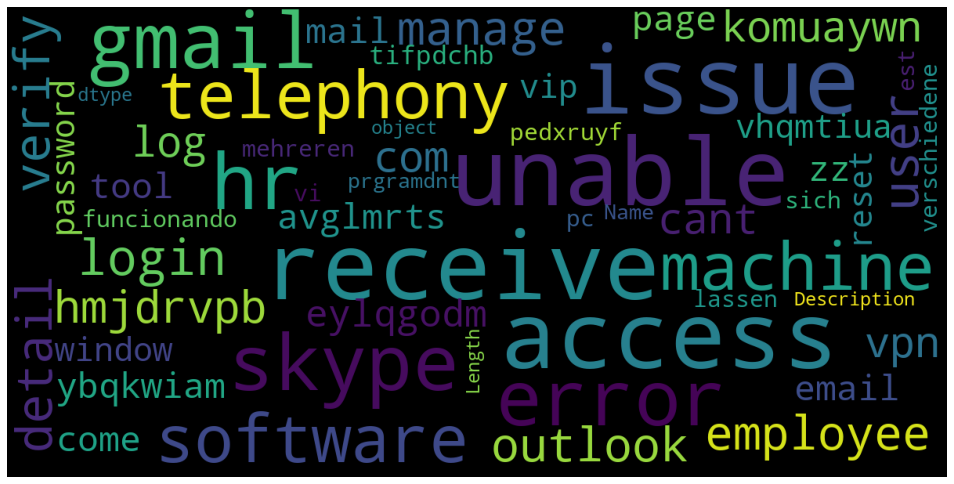

In [64]:
show_wordcloud(df_final["Description"])

In [0]:
X = []
sentences = list(df_final["Description"])
for sen in sentences:
    X.append(sen)
y=df_final['Target']

In [0]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Target'. 
y= label_encoder.fit_transform(y) 

In [44]:
from keras.utils import to_categorical
y = to_categorical(y)

Using TensorFlow backend.


In [0]:
maxlen = 1266
tokenizer = Tokenizer(num_words=maxlen,split=' ')
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

In [0]:
vocab_size = len(tokenizer.word_index) + 1
maxlen = 200
X = pad_sequences(X, padding='post', maxlen=maxlen)
y= pad_sequences(y, padding='post', maxlen=maxlen)
#X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [47]:
#Splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

'X_train = np.asarray(X_train).reshape(-1,1)\nX_test = np.asarray(X_test).reshape(-1,1)\ny_train = np.asarray(y_train).reshape(-1,1)\ny_test = np.asarray(y_test).reshape(-1,1)'

 **Weight matrix using GloVe embeddings**

In [0]:
glove_file = "/content/drive/My Drive/glove.6B.zip"

In [0]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

In [50]:
EMBEDDING_FILE = '/content/glove.6B.100d.txt'
embeddings_dictionary = {}
for o in open(EMBEDDING_FILE):
    records = o.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions

print('Found %s word vectors.' % len(embeddings_dictionary))

Found 400001 word vectors.


In [0]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
#embedd_index['good']

In [0]:
#importing libraries for model building
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

In [0]:
model = Sequential()
model.add(Embedding(vocab_size, 100, weights = [embedding_matrix]))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(Dense(40, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1393000   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         234496    
_________________________________________________________________
dense (Dense)                (None, None, 40)          10280     
_________________________________________________________________
dropout (Dropout)            (None, None, 40)          0         
_________________________________________________________________
dense_1 (Dense)              (None, None, 20)          820       
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 20)          0         
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           2

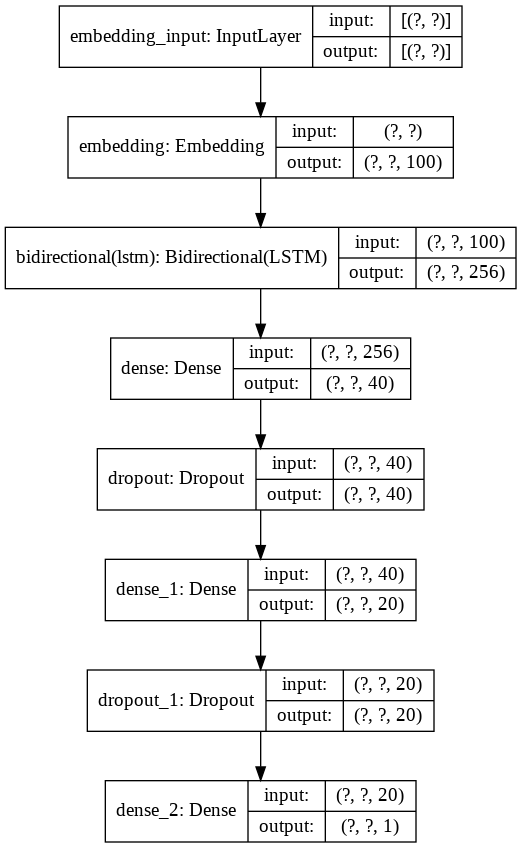

In [55]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='/content/drive/My Drive/model_plot1.png', show_shapes=True, show_layer_names=True)

In [56]:
batch_size = 100
epochs = 5
history = model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=1,validation_data=(X_test, y_test))

Epoch 1/5
55/55 [==============================] - 68s 1s/step - loss: 0.1895 - accuracy: 0.9662 - val_loss: 0.0351 - val_accuracy: 0.9950
Epoch 2/5
55/55 [==============================] - 67s 1s/step - loss: 0.0470 - accuracy: 0.9929 - val_loss: 0.0305 - val_accuracy: 0.9950
Epoch 3/5
55/55 [==============================] - 67s 1s/step - loss: 0.0376 - accuracy: 0.9943 - val_loss: 0.0242 - val_accuracy: 0.9950
Epoch 4/5
55/55 [==============================] - 67s 1s/step - loss: 0.0309 - accuracy: 0.9947 - val_loss: 0.0199 - val_accuracy: 0.9955
Epoch 5/5
55/55 [==============================] - 67s 1s/step - loss: 0.0274 - accuracy: 0.9951 - val_loss: 0.0197 - val_accuracy: 0.9959


In [57]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

54/54 [==============================] - 5s 98ms/step - loss: 0.0211 - accuracy: 0.9957
Test Score: 0.021124379709362984
Test Accuracy: 0.9957497715950012


In [0]:
import matplotlib.pyplot as plt
def plot_accuracy(history, miny=None):
  acc = history.history['accuracy']
  test_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plt.plot(epochs, acc)
  plt.plot(epochs, test_acc)
  if miny:
    plt.ylim(miny, 1.0)
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper left')
  plt.show()

  lossacc=history.history['loss']
  testloss=history.history['val_loss']
  lossepochs=range(len(lossacc))
  plt.plot(lossepochs,lossacc)
  plt.plot(lossepochs,testloss)

  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper left')
  plt.show()
  plt.figure()

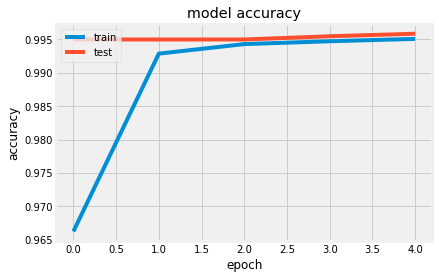

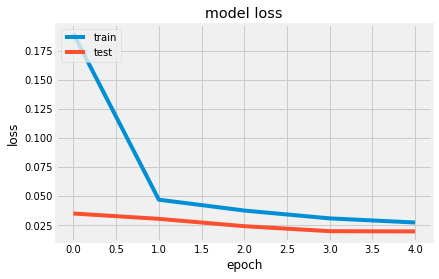

<Figure size 432x288 with 0 Axes>

In [62]:
plot_accuracy(history)